In [27]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib
import sys

In [28]:
sys.path.insert(0, '..')

In [29]:
from convlstm_classes import EncoderDecoderConvLSTM

In [30]:
dataset = torch.tensor(np.load('../../convlstm/splits/dataset.npy'))

In [31]:
dataset_norm = torch.tensor(np.load('../../convlstm/splits/dataset_normalized.npy'))

In [32]:
X = dataset_norm[:,:11,:,:,:]

In [33]:
y = dataset_norm[:,11:,:,:,:]

In [34]:
y_un = dataset[:,11:,:,:,:]

In [35]:
future_steps = 30

In [36]:
model = EncoderDecoderConvLSTM()

In [37]:
model.load_state_dict(torch.load('../best_model_params.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [38]:
test_len = int(len(X) * 0.2)

In [39]:
the_range = list(range(len(X) - test_len, len(X)))

In [40]:
np.random.seed(42)

In [41]:
sample_indices = np.random.choice(the_range, size=20, replace=False)

In [42]:
sample_indices

array([809, 760, 782, 706, 745, 680, 752, 702, 751, 795, 670, 735, 666,
       717, 675, 681, 794, 755, 749, 667])

In [43]:
sample = X[sample_indices,:,:,:,:]

In [44]:
y_pred = model(sample).squeeze(2).detach().numpy()

In [45]:
y_pred.shape

(20, 30, 10, 20)

In [46]:
y_true = y[sample_indices,:,1,:,:].numpy()

In [47]:
y_true.shape

(20, 30, 10, 20)

In [48]:
for_mask = y_un[sample_indices,:,1,:,:]

In [49]:
y_pred = np.ma.masked_where(for_mask.isnan(), y_pred)

In [50]:
y_true = np.ma.masked_where(for_mask.isnan(), y_true)

In [51]:
cmap = plt.get_cmap('Blues')

In [52]:
cmap.set_bad(color='green')

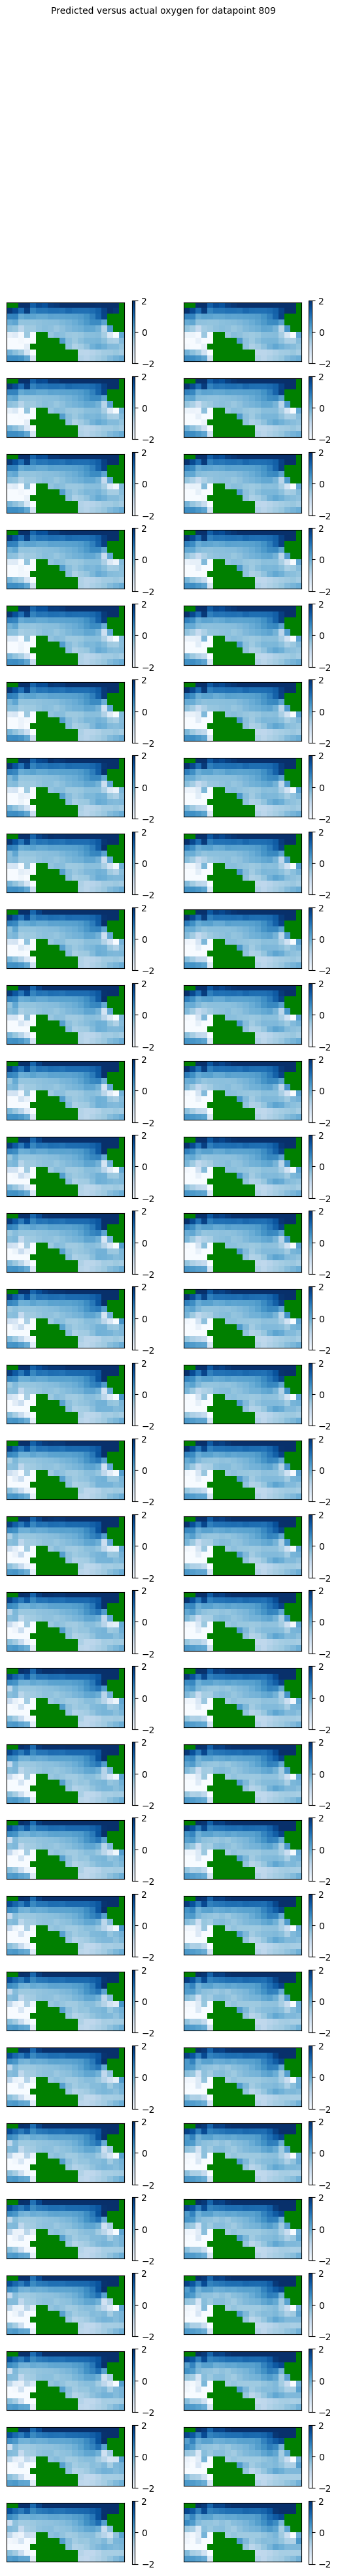

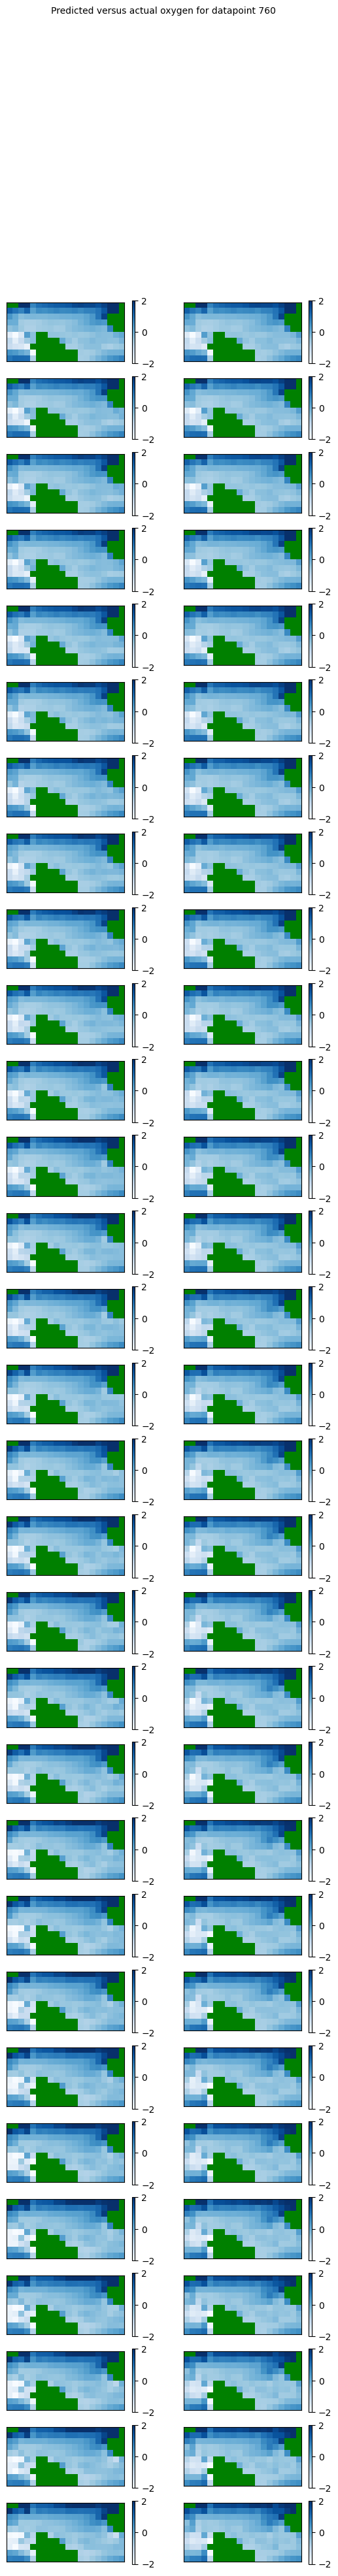

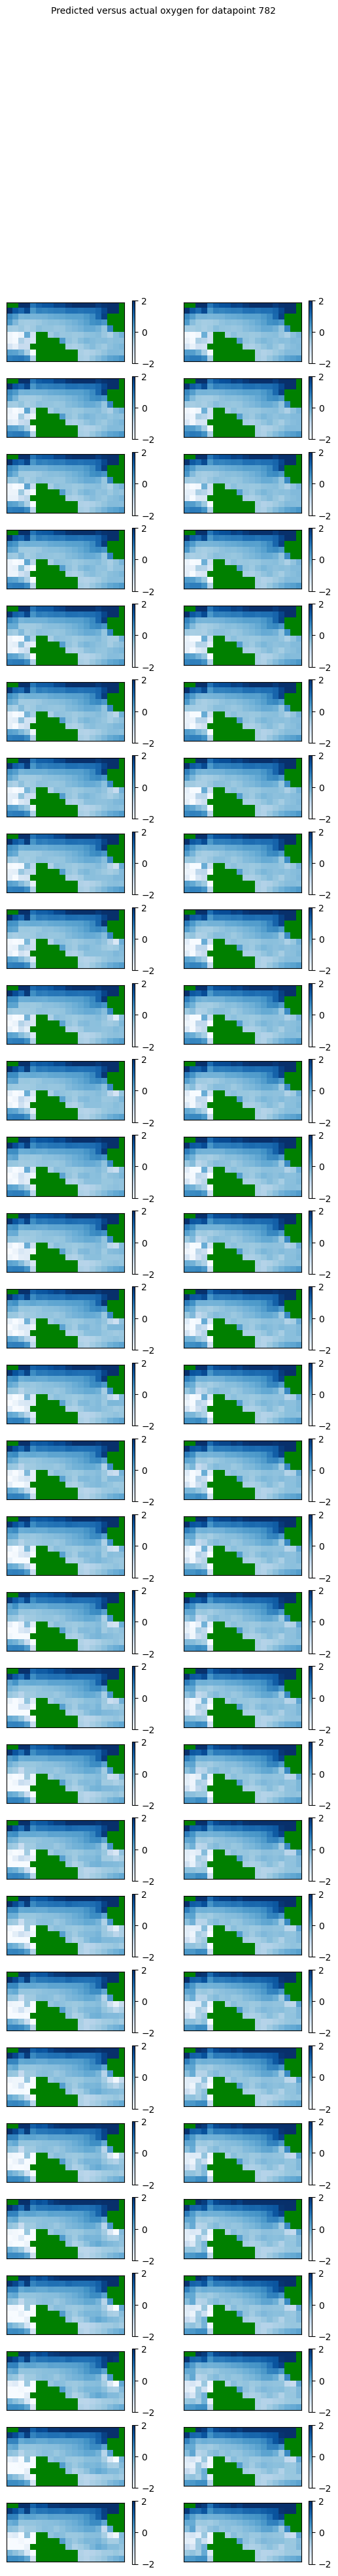

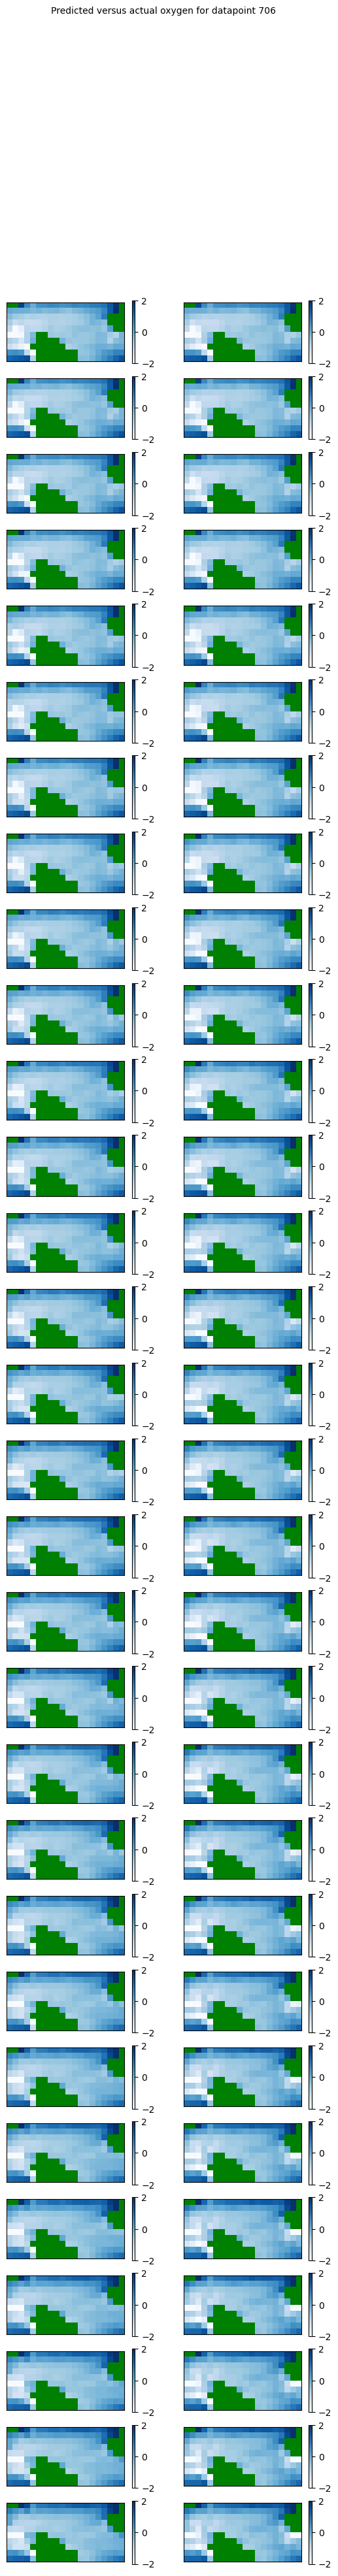

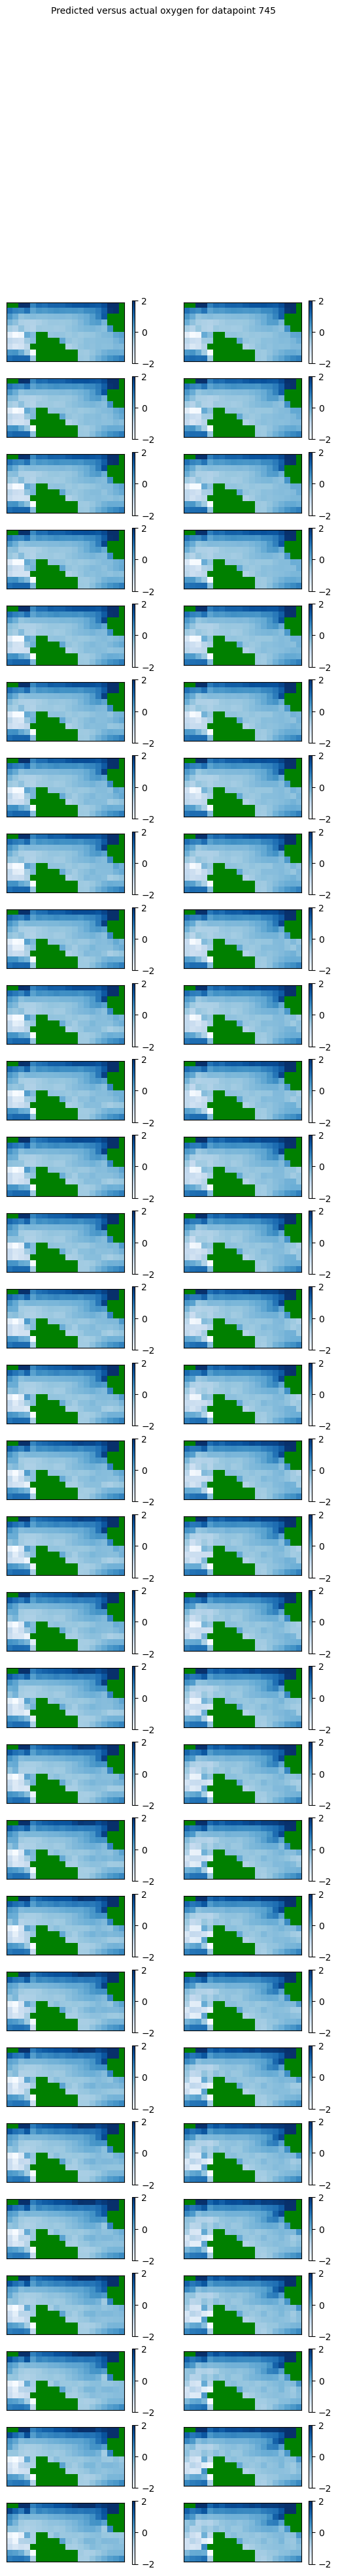

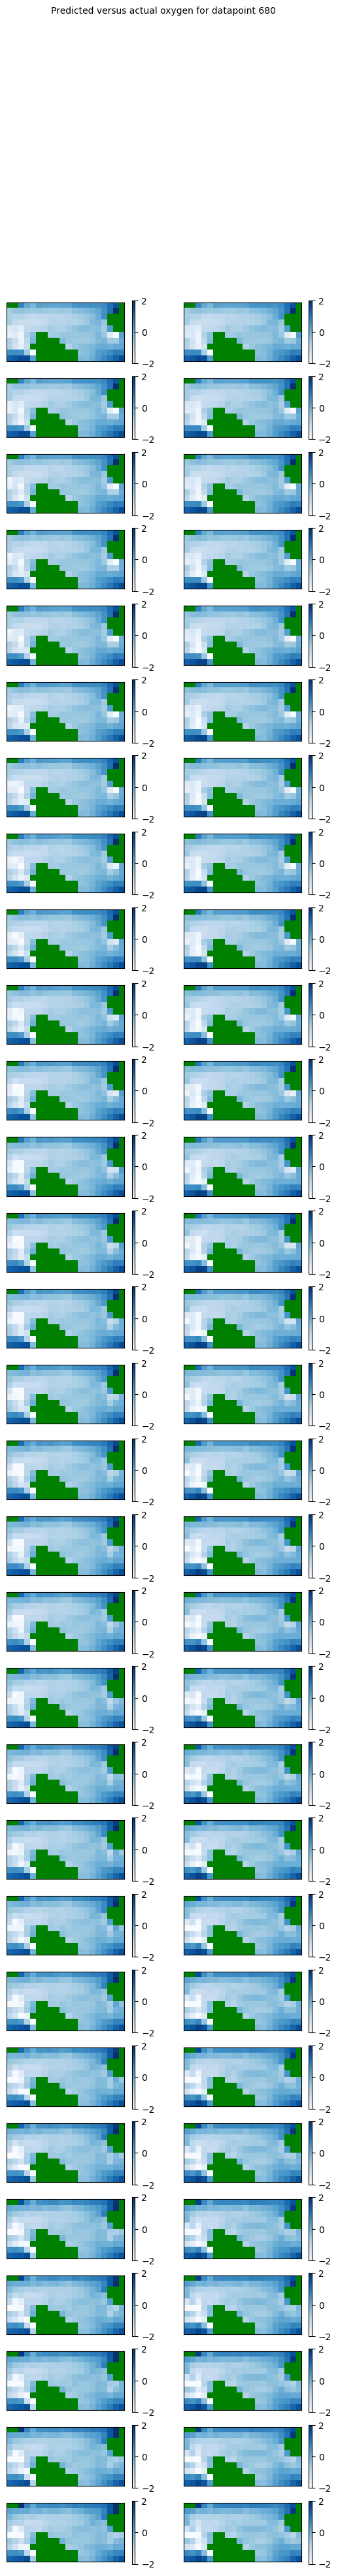

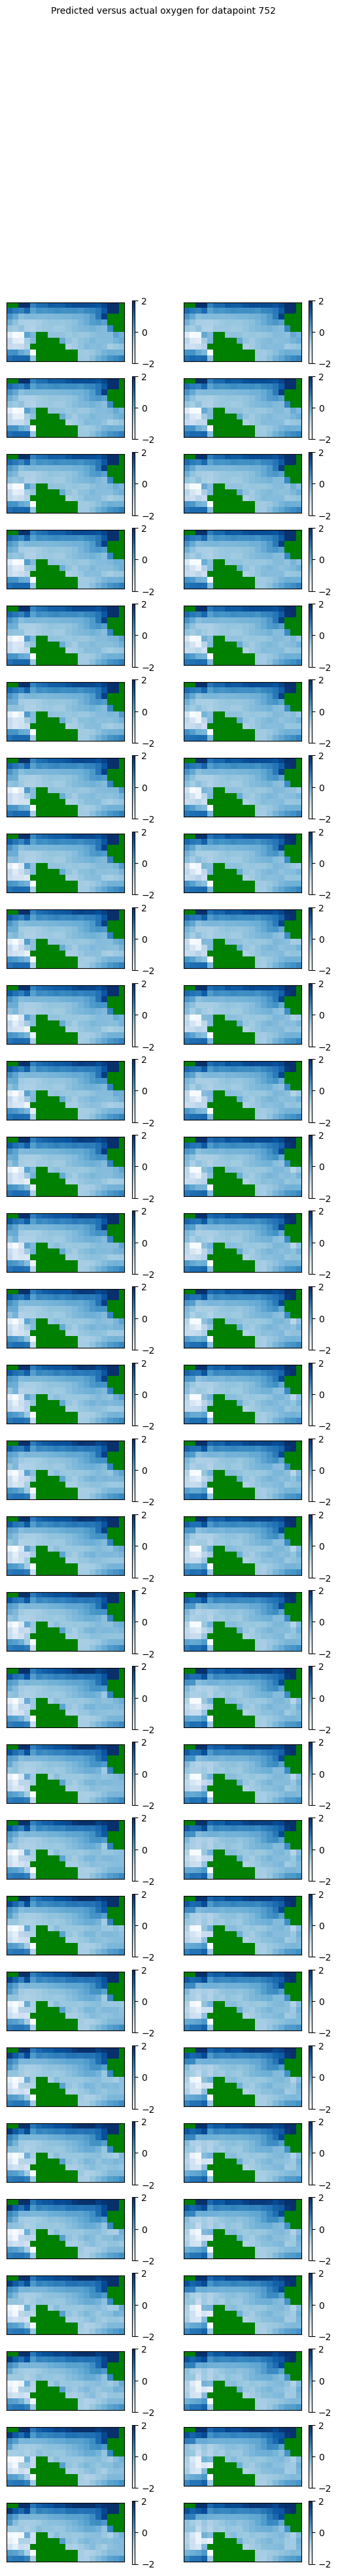

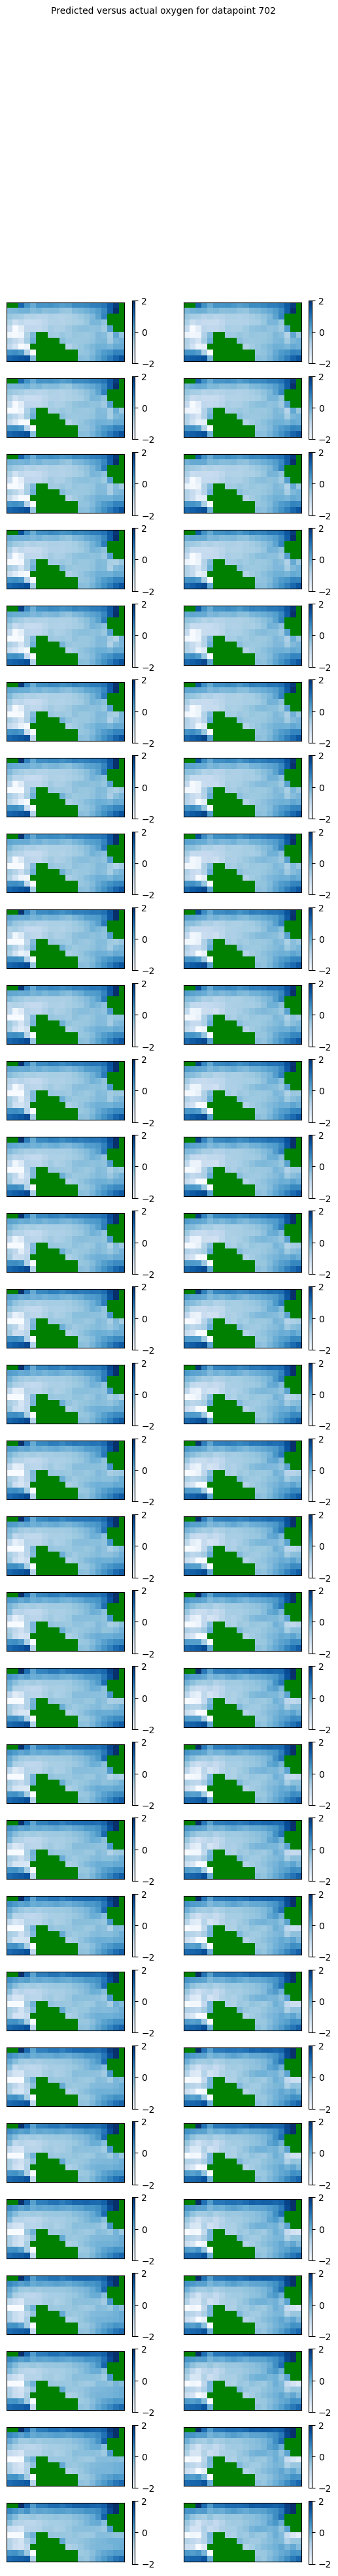

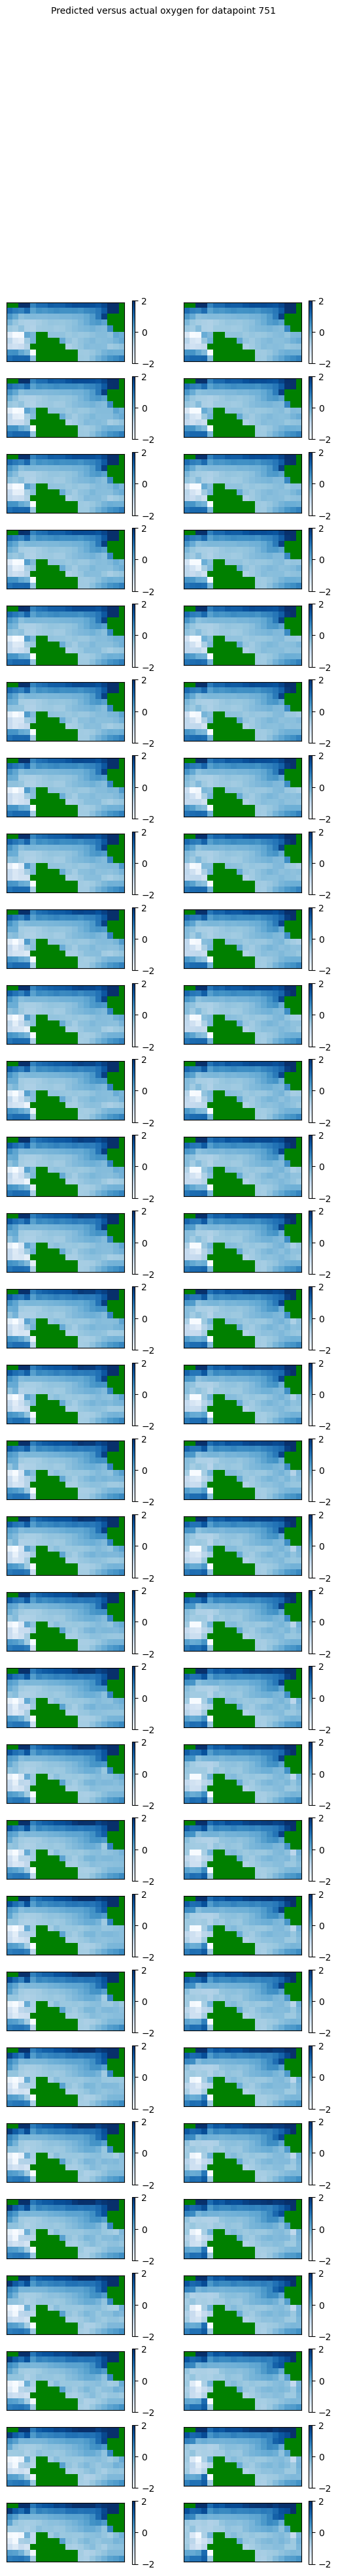

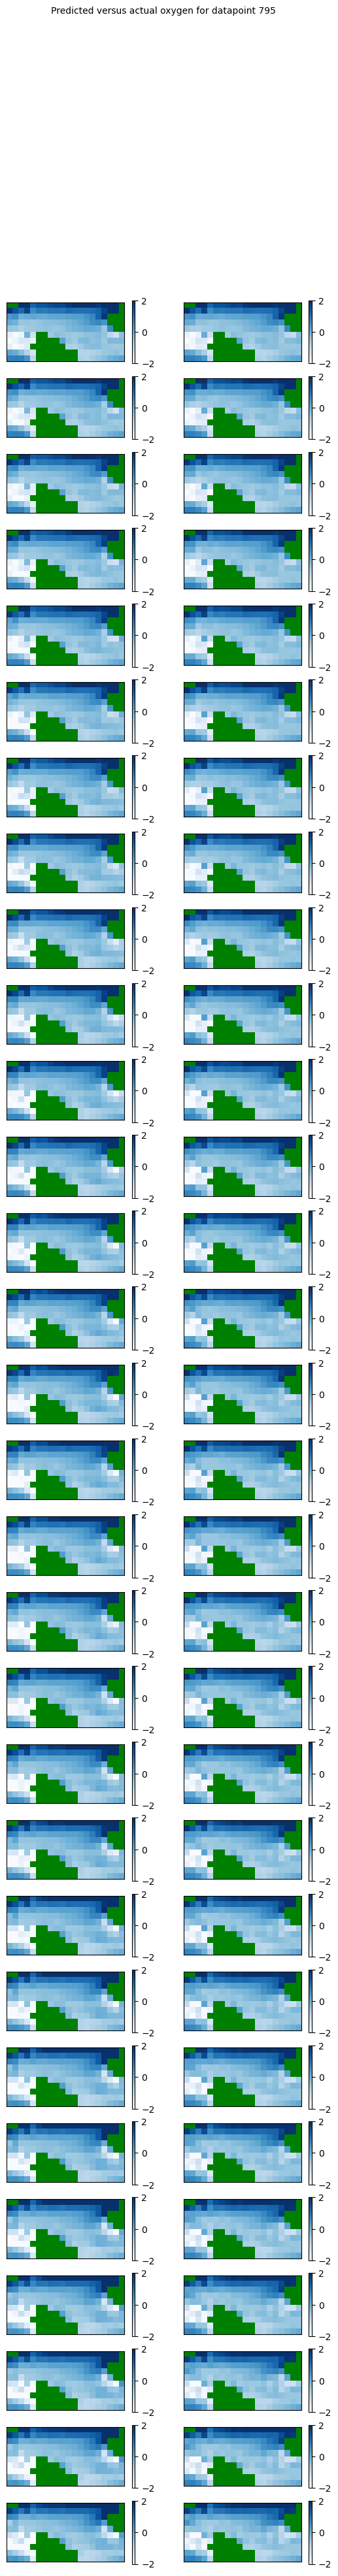

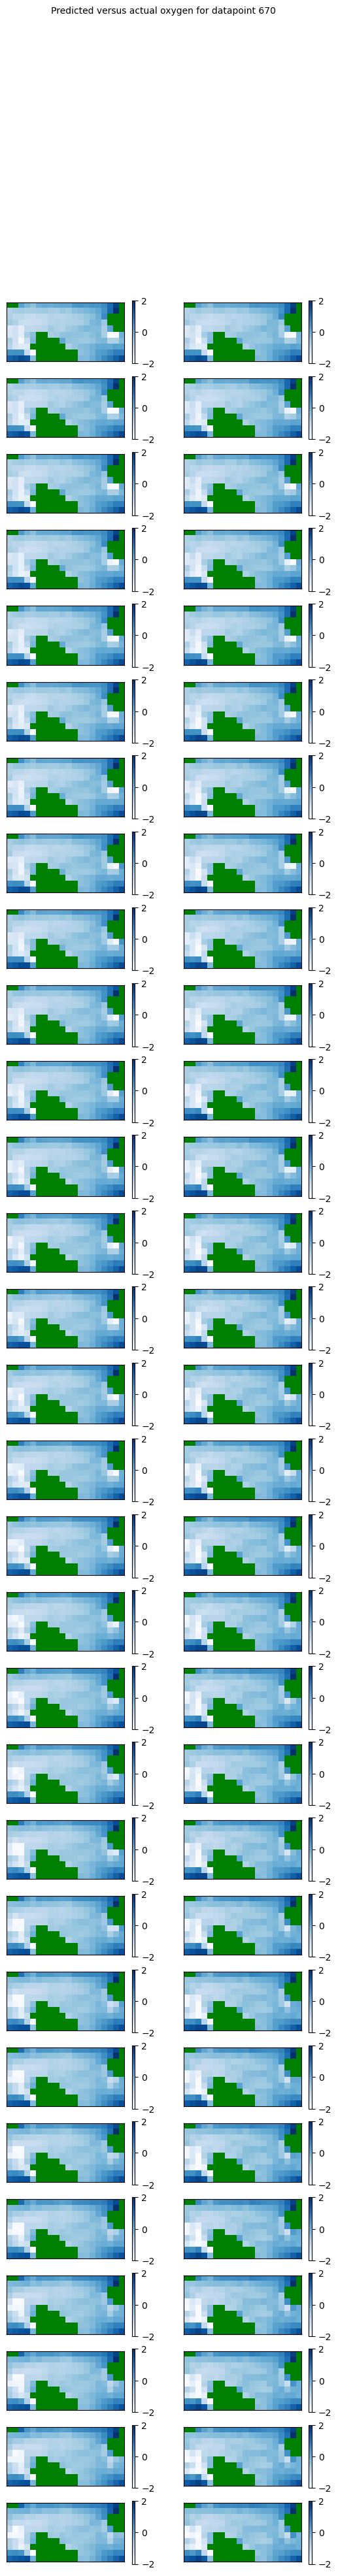

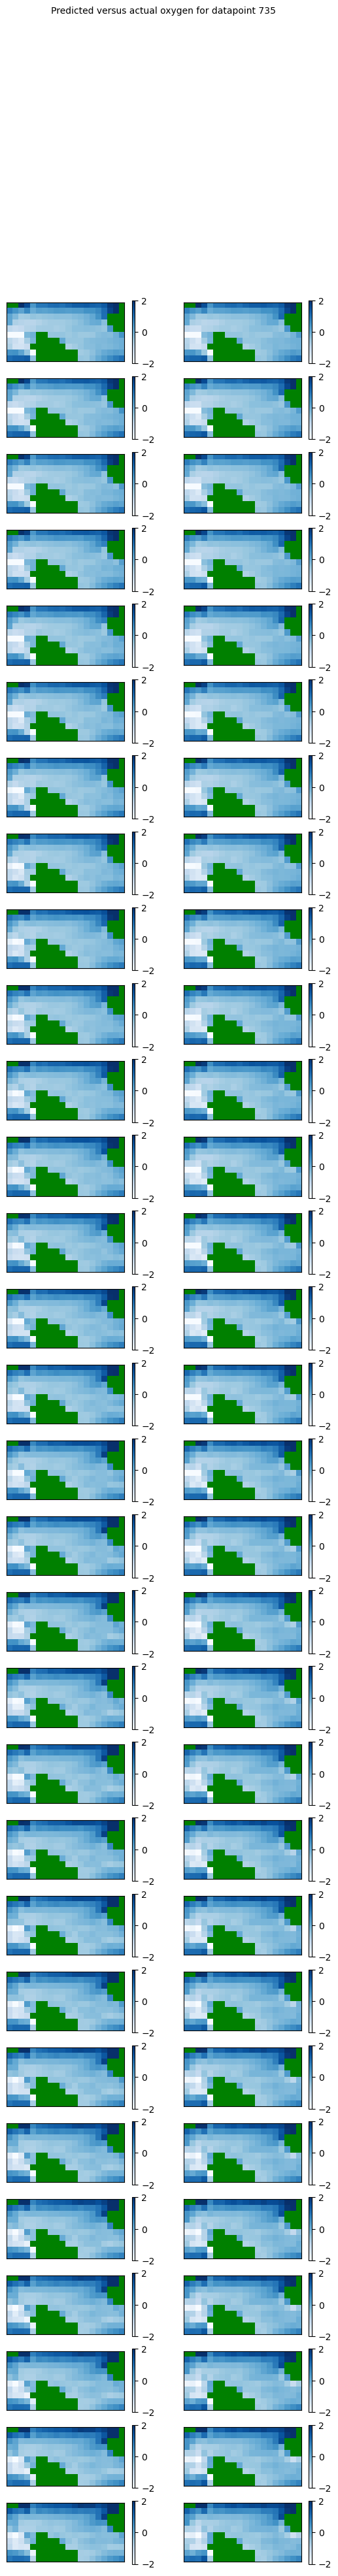

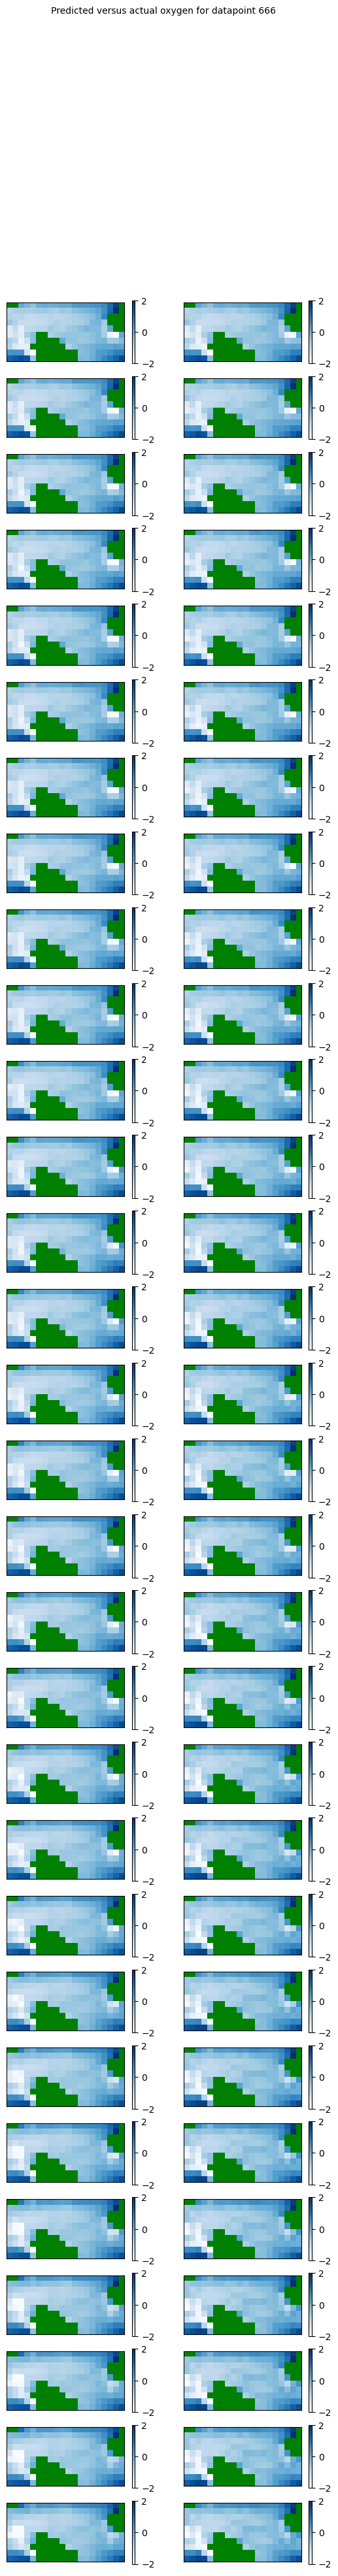

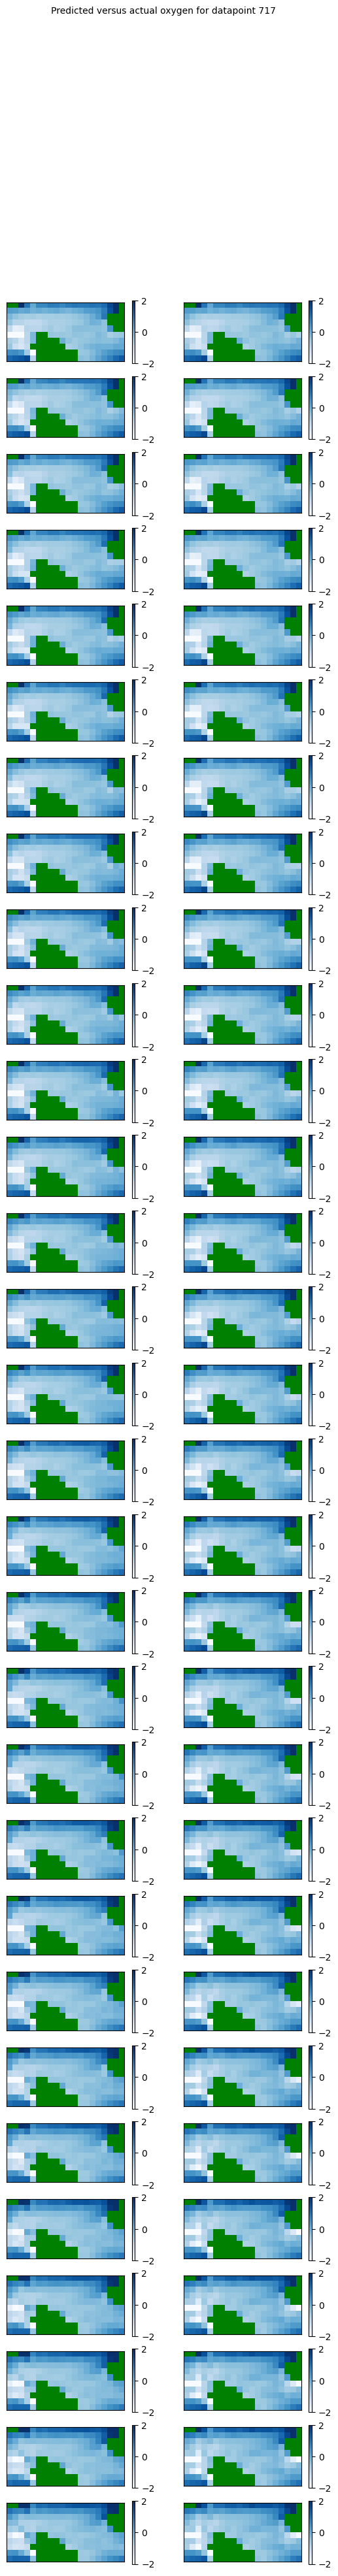

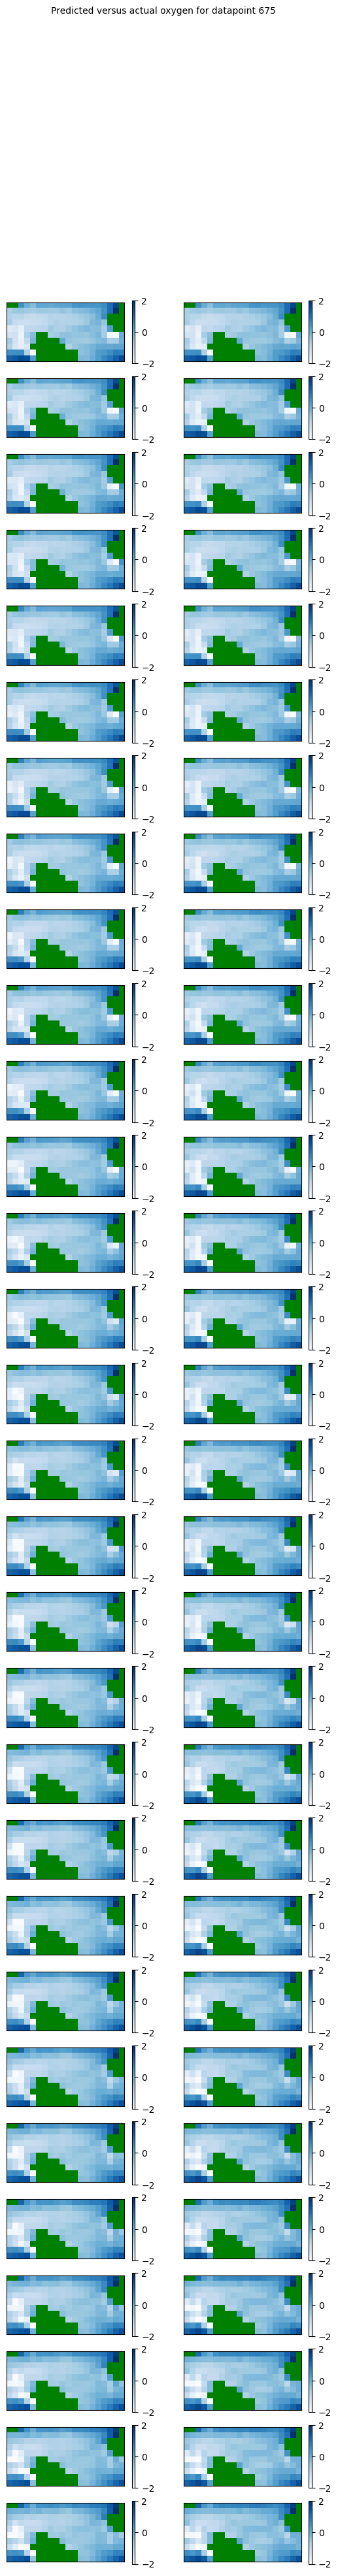

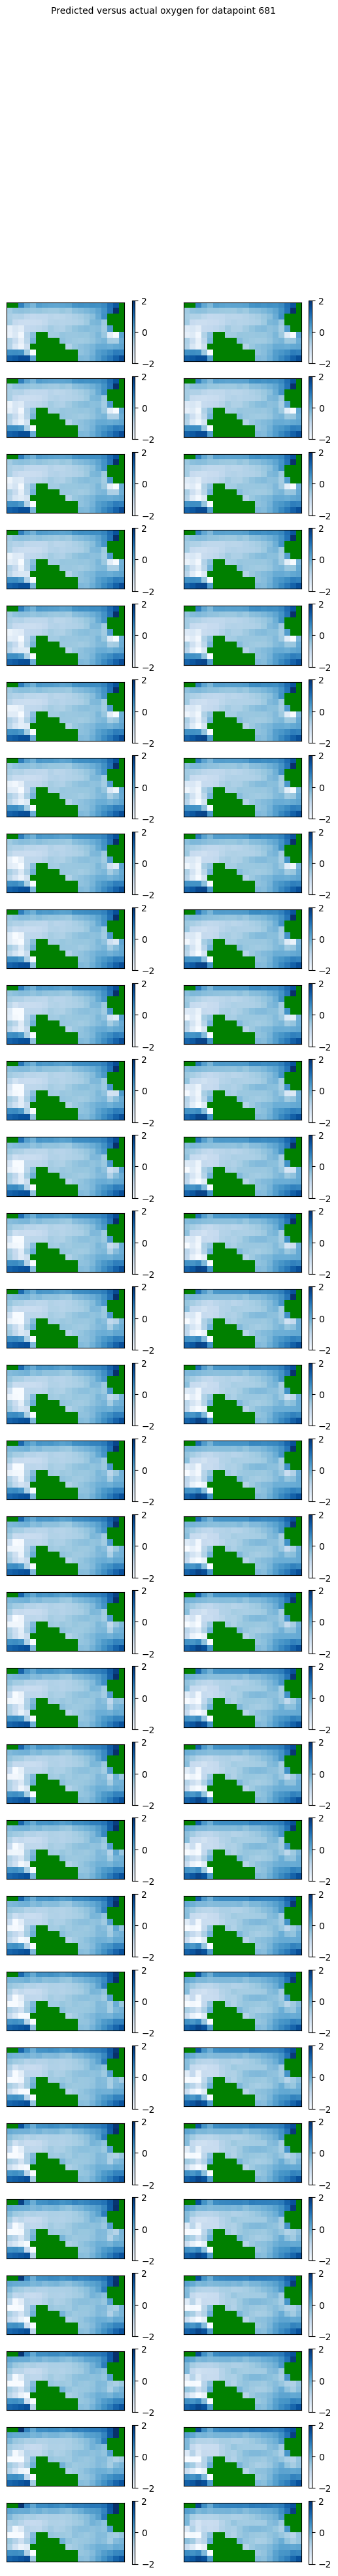

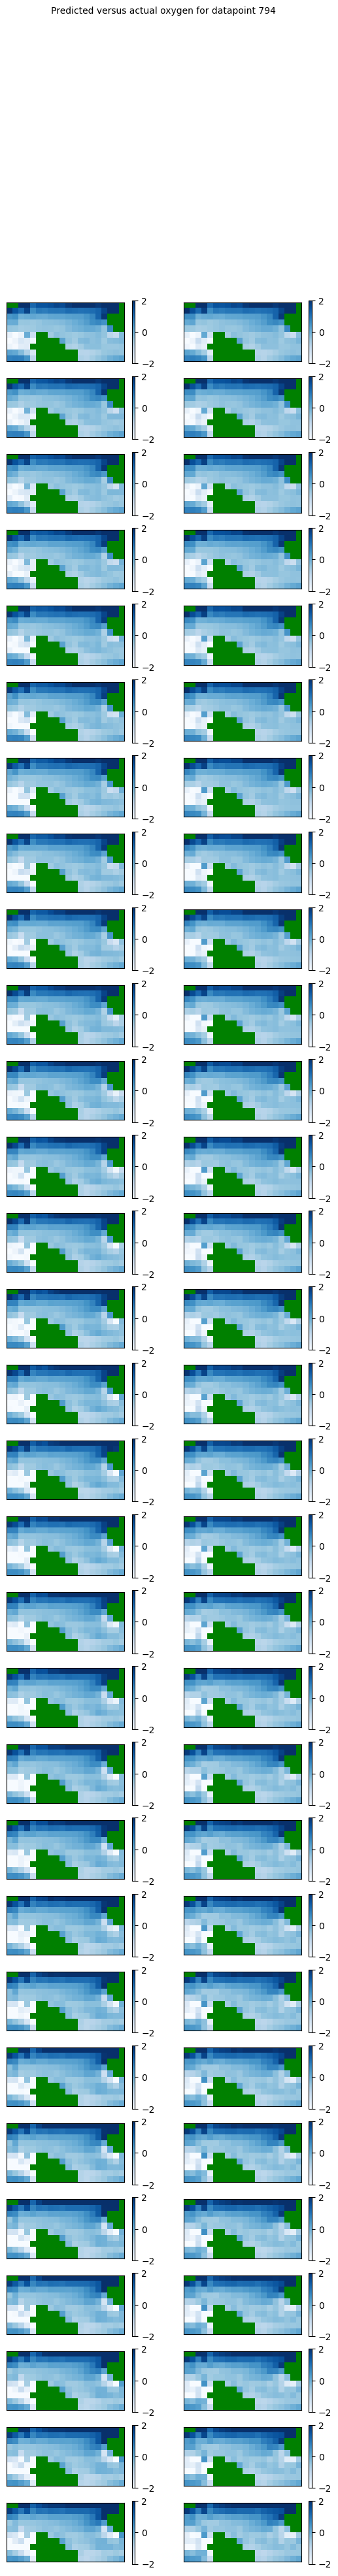

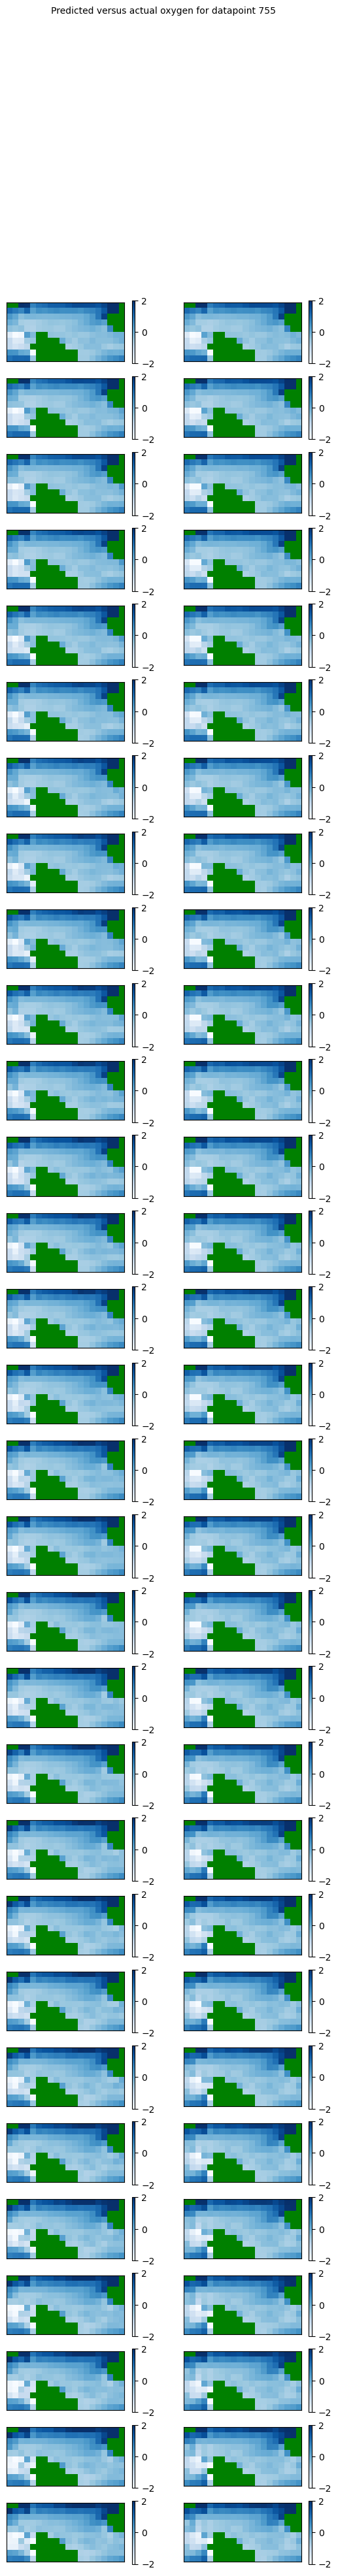

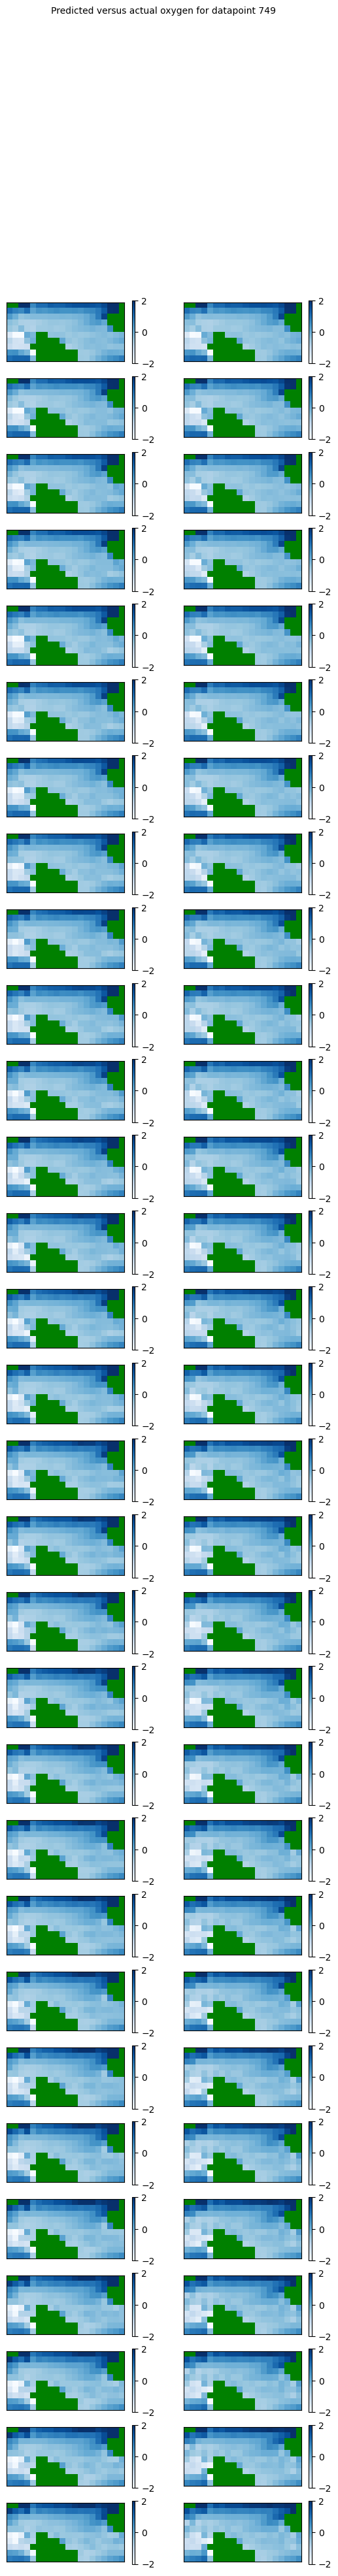

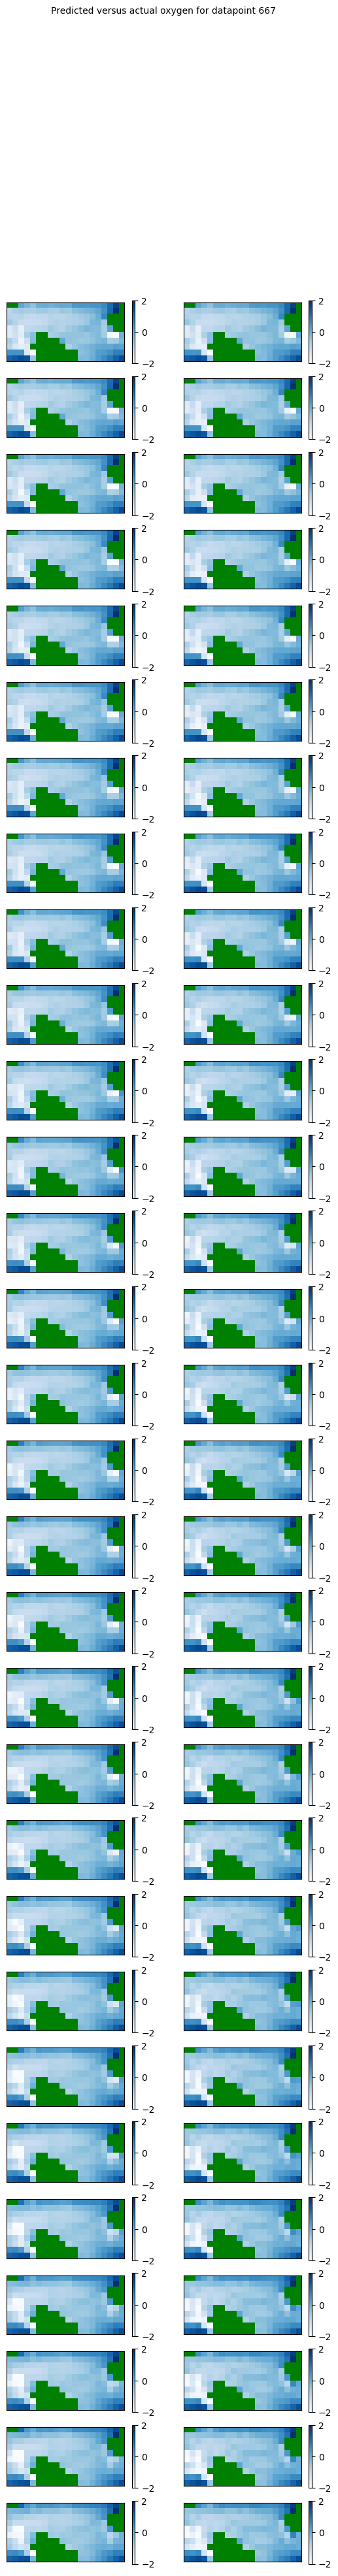

In [53]:
for i, ind in enumerate(sample_indices):
    y_pred_ = y_pred[i]
    y_true_ = y_true[i]

    fig, axes = plt.subplots(30,2)

    fig.set_figheight(45)
    
    fig.suptitle(f'Predicted versus actual oxygen for datapoint {ind}', fontsize=10)
    
    for j in range(30):
        axs = axes[j]
        axs[0].get_xaxis().set_ticks([])
        axs[0].get_yaxis().set_ticks([])
        axs[1].get_xaxis().set_ticks([])
        axs[1].get_yaxis().set_ticks([])
        t = axs[0].imshow(y_true_[j], cmap=cmap, vmin=-2, vmax=2, origin='lower')
        p = axs[1].imshow(y_pred_[j], cmap=cmap, vmin=-2, vmax=2, origin='lower')
        fig.colorbar(t, ax=axs[0], location='right')
        fig.colorbar(p, ax=axs[1], location='right')
    
    plt.savefig(f'graph_point_{ind}.pdf', format='pdf')
    plt.show()

In [100]:
new_for_mask = y_un[-test_len:,:,1]

In [101]:
X_test = X[-test_len:]

In [102]:
y_test = y[-test_len:,:,1]

In [103]:
y_out = model(X_test).squeeze(2).detach().numpy()

In [104]:
y_no = torch.stack(future_steps * [X_test[:,-1,1]], 1)

In [105]:
y_test = np.ma.masked_where(new_for_mask.isnan(), y_test)

In [106]:
y_out = np.ma.masked_where(new_for_mask.isnan(), y_out)

In [107]:
y_no = np.ma.masked_where(new_for_mask.isnan(), y_no)

In [108]:
y_no.shape

(162, 30, 10, 20)

In [109]:
y_test.shape

(162, 30, 10, 20)

In [110]:
y_out.shape

(162, 30, 10, 20)

In [112]:
np.mean((y_no - y_test)**2)

0.06395774391289438

In [113]:
np.mean((y_out - y_test)**2)

0.05321236619957578

In [114]:
np.mean((y_no - y_test).data**2)

0.051805772

In [115]:
np.mean((y_out - y_test).data**2)

0.04431089